# Initialize

In [19]:
%cd "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA"

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA


/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [20]:
visible_devices = [1]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset_np # type: ignore
from GMetrics.utils import se_mean, se_std
from GMetrics.metrics.NPLM import candidate_sigma

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2025-10-20 11:25:43.607875: Importing os...
2025-10-20 11:25:43.607981: Importing sys...
Visible devices: [1]
2025-10-20 11:25:43.608212: Importing timer from timeit...
2025-10-20 11:25:43.608281: Setting env variables for tf import (only device(s) [1] will be available)...
2025-10-20 11:25:43.608408: Importing numpy...
2025-10-20 11:25:43.608466: Importing matplotlib...
2025-10-20 11:25:43.608525: Importing h5py...
2025-10-20 11:25:43.608577: Importing importlib.util...
2025-10-20 11:25:43.608631: Importing json...
2025-10-20 11:25:43.608680: Importing pandas...
2025-10-20 11:25:43.608737: Importing random...
2025-10-20 11:25:43.608788: Importing scipy utils...
2025-10-20 11:25:43.608893: Importing subprocess...
2025-10-20 11:25:43.608946: Importing textwrap...
2025-10-20 11:25:43.608995: Importing tensorflow...
Tensorflow version: 2.16.1
2025-10-20 11:25:43.609076: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2025-10-20 11:25:43.609170: Importing timeit.

# Load data

In [21]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [22]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [23]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [24]:
results_dir = "results/jet_features/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories were created")
else:
    print("Directory alredy exists")

Directory alredy exists


In [25]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_jet_features(jet_features):
    p_T_jet = jet_features[:,1]
    eta_jet = jet_features[:,2]
    m_jet = jet_features[:,3]
    m_jet_over_p_T_jet = m_jet / p_T_jet
    return tf.stack([p_T_jet, eta_jet, m_jet, m_jet_over_p_T_jet], axis=1)

jet_features_reduced = get_reduced_jet_features(jet_features)
jet_features_reduced.shape

TensorShape([177252, 4])

# TwoSample Test

In [26]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '20K_preprocessed/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory {model_dir} has been created")
else:
    print(f"Directory {model_dir} already exists")

jet_features_reduced = get_reduced_jet_features(jet_features)

mean = tf.reduce_mean(jet_features_reduced, axis=0)
std = tf.math.reduce_std(jet_features_reduced, axis=0)
    
dataset = preprocess_data(jet_features_reduced, mean, std)

Directory results/jet_features/tests/20K_preprocessed/ already exists


## Bootstrapping Null Hypothesis

In [27]:
m_value = 7000
lam_value = 1e-8

In [28]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
    print(f"Directory {null_hypotheses_dir} has been created")
else:
    print(f"Directory {null_hypotheses_dir} already exists")
    
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

# null_hypotheses_dir = model_dir + f"null_hypothesis_M_{m_value}_lam_{lam_value}/"
# if os.path.exists(null_hypotheses_dir):
#     print("Null hypothesis directory exists")
# else:
#     os.makedirs(null_hypotheses_dir)
#     print("Null hypothesis directory was created")
# metrics_config_file = model_dir + f"metrics_config_M_{m_value}_lam_{lam_value}.json"

Directory results/jet_features/tests/20K_preprocessed/null_hypotheses/ already exists


In [29]:
niter_tot = 1_000
batch_size_test = 20_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)

niter: 4, nbootstrap: 250
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.


In [30]:
flk_sigma = candidate_sigma(dist_1_null, perc = 90)  

Finite Dataset Case.
The Gaussian kernel sigma is estimated as the 90th percentile of the pairwise distance among 10000 points extracted from the reference data. 
The value of sigma is: 4.3


In [31]:
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)
NPLMMetric = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                 progress_bar = True,
                                 verbose = True,
                                 M = m_value, 
                                 lam = lam_value, 
                                 iter_list = 1000000,
                                 flk_sigma = flk_sigma,
                                 weight = 1) 

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [32]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputsNull.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,4,20000,1000,10000000,float64,0,True,False,None,True,False,4,80000,False,4,80000,float64,4,80000,True


In [33]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200, # optimized for 5D
                                       "latex": "t_{\mathrm{FGD}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 8, # optimized for 5D
                                       "latex": "t_{\mathrm{MMD}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {"verbose": True}, 
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200,
                                       "latex": "t_{\overline{\mathrm{KS}}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "t_{\mathrm{SKS}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "t_{\mathrm{SW}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")},
                                "NPLM": {"name": "nplm",
                                       "object_name": "NPLMMetric",
                                       "class_name": "GMetrics.NPLMMetric",
                                       "kwargs": {"M": m_value,
                                                  "lam": lam_value,
                                                  "iter_list": 1000000,
                                                  "flk_sigma": flk_sigma,
                                                  "weight" : 1},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "t_{\mathrm{NPLM}}",
                                       "null_file": null_hypotheses_dir+f"NPLM_M_{m_value}_lam_{lam_value}.json"}}}

print(metrics_config[unique_key])
nplm_config = metrics_config[unique_key]["NPLM"]
print(nplm_config)
print(metrics_config[unique_key]["NPLM"]["object_name"])

{'fgd': {'name': 'fgd', 'object_name': 'FGDMetricNull', 'class_name': 'GMetrics.FGDMetric', 'kwargs': {'num_batches': 20, 'num_points': 10, 'normalise': False, 'verbose': True}, 'result_key': 'metric_list', 'scale_func': <function <lambda> at 0x7fc652300540>, 'scale_func_string': 'lambda ns, ndims: 1', 'test_config': {'niter': 4, 'batch_size_test': 20000, 'batch_size_gen': 1000, 'small_sample_threshold': 10000000, 'dtype_input': 'float64', 'seed': 0, 'use_tf': True, 'mirror_strategy': False, 'strategy': None, 'verbose': True, 'is_symb_1': False, 'ndims_1': 4, 'nsamples_1': 80000, 'is_symb_2': False, 'ndims_2': 4, 'nsamples_2': 80000, 'dtype': 'float64', 'ndims': 4, 'nsamples': 80000, 'small_sample': True}, 'max_vectorize': 3200, 'latex': 't_{\\mathrm{FGD}}', 'null_file': 'results/jet_features/tests/20K_preprocessed/null_hypotheses/FGD.json'}, 'mmd': {'name': 'mmd', 'object_name': 'MMDMetricNull', 'class_name': 'GMetrics.MMDMetric', 'kwargs': {'degree': 4, 'block_size': 10000, 'normalis

In [34]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
            del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/jet_features/tests/20K_preprocessed/null_hypotheses/FGD.json
Loading mmd from results/jet_features/tests/20K_preprocessed/null_hypotheses/MMD.json
Loading ks from results/jet_features/tests/20K_preprocessed/null_hypotheses/KS.json
Loading sks from results/jet_features/tests/20K_preprocessed/null_hypotheses/SKS.json
Loading swd from results/jet_features/tests/20K_preprocessed/null_hypotheses/SWD.json
Loading nplm from results/jet_features/tests/20K_preprocessed/null_hypotheses/NPLM_M_7000_lam_1e-08.json


In [35]:
cl_list = [0.68, 0.95, 0.99]
null_times = []
ndims = 4

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [680, 319], 0.000137663716558022], [0.95, [950, 50], 0.0011782715156579177], [0.99, [990, 10], 0.0019863818688175905]]
Computing time for metric fgd: 533.1560143078677
ThresholdS for metric mmd: [[0.68, [680, 319], 0.0024406494027040537], [0.95, [950, 50], 0.034471641509035145], [0.99, [990, 10], 0.05952059616931038]]
Computing time for metric mmd: 910.2889097570442
ThresholdS for metric ks: [[0.68, [680, 319], 0.9212497621774673], [0.95, [950, 50], 1.1437498033046722], [0.99, [990, 10], 1.3075008988380432]]
Computing time for metric ks: 341.39119938388467
ThresholdS for metric sks: [[0.68, [680, 319], 0.9036000818014145], [0.95, [950, 50], 1.1010502465069294], [0.99, [990, 10], 1.2196001596748829]]
Computing time for metric sks: 915.0824342216365
ThresholdS for metric swd: [[0.68, [680, 319], 0.6911942036384819], [0.95, [950, 50], 0.9041296771995025], [0.99, [990, 10], 1.0470402613112961]]
Computing time for metric swd: 292.0713685103692
ThresholdS f

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fgd,FGDMetricNull,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fc652300540>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",3200,t_{\mathrm{FGD}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.000137663716558022], [0...."
1,mmd,MMDMetricNull,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7fc652300400>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",8,t_{\mathrm{MMD}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.0024406494027040537], [0..."
2,ks,KSTestNull,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7fc6523002c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",3200,t_{\overline{\mathrm{KS}}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.9212497621774673], [0.95..."
3,sks,SKSTestNull,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7fc652300220>,"lambda ns, _: np.sqrt(ns)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",100,t_{\mathrm{SKS}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.9036000818014145], [0.95..."
4,swd,SWDMetricNull,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7fc652300680>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",100,t_{\mathrm{SW}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.6911942036384819], [0.95..."
5,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 7000, 'lam': 1e-08, 'iter_list': 1000000...",metric_list,<function <lambda> at 0x7fc652300720>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",1000,t_{\mathrm{NPLM}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 197.09771227853645], [0.95..."


### Plots of null-distributions

mu = 0.00022416676733671588 +/- 6.663681172857893e-09
sigma = 0.0004590469486600814 +/- 3.023268290754409e-05
68%CL = 0.000137663716558022, 95%CL = 0.0011782715156579177, 99%CL = 0.0019863818688175905
mu = 0.00022416676733671588 +/- 6.663681172857893e-09
sigma = 0.0004590469486600814 +/- 3.023268290754409e-05


/tmp/ipykernel_1646232/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1646232/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1646232/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


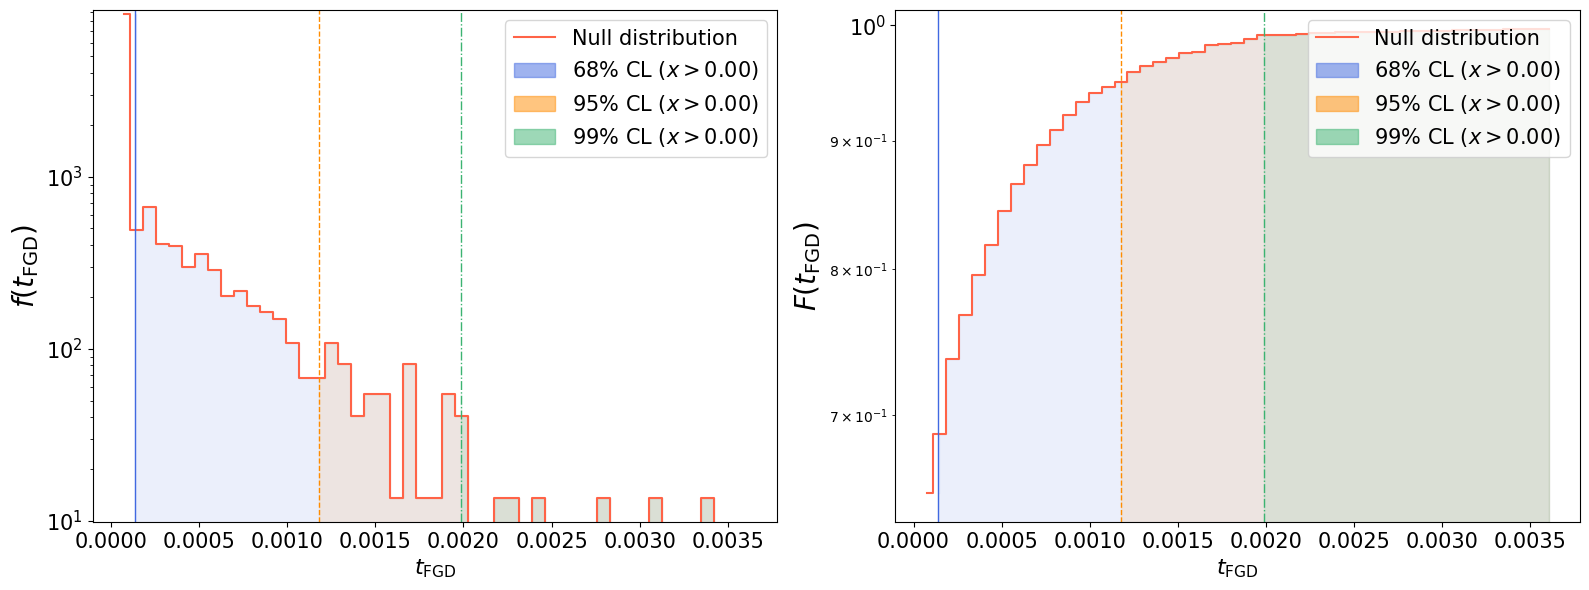

Time elapsed: 0.9916629591025412 seconds.
mu = 0.0004052046212520044 +/- 7.974031514950927e-06
sigma = 0.0158795786219937 +/- 0.0006597451567916212
68%CL = 0.0024406494027040537, 95%CL = 0.034471641509035145, 99%CL = 0.05952059616931038
mu = 0.0004052046212520044 +/- 7.974031514950927e-06
sigma = 0.0158795786219937 +/- 0.0006597451567916212


/tmp/ipykernel_1646232/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1646232/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1646232/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1646232/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


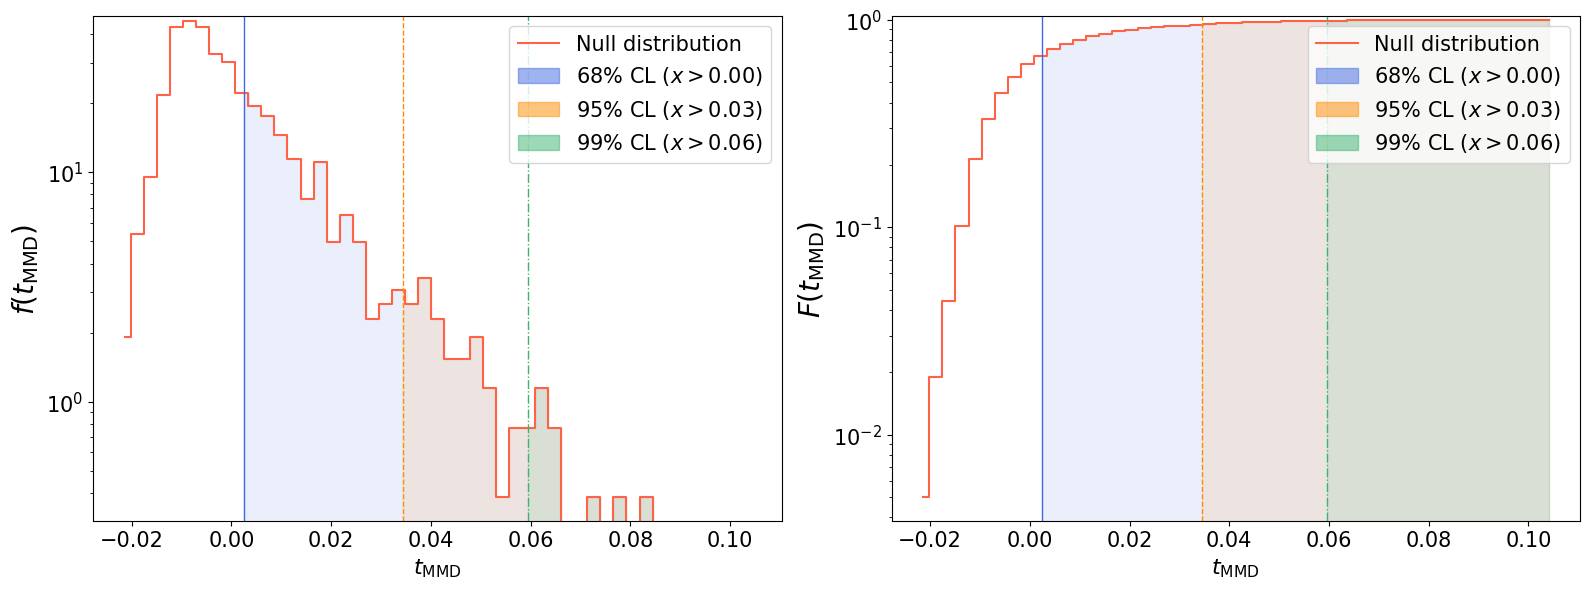

Time elapsed: 0.6812103101983666 seconds.
mu = 0.864641735330224 +/- 0.0007435671625325369
sigma = 0.1533416390583925 +/- 0.004050172410442215
68%CL = 0.9212497621774673, 95%CL = 1.1437498033046722, 99%CL = 1.3075008988380432
mu = 0.864641735330224 +/- 0.0007435671625325369
sigma = 0.1533416390583925 +/- 0.004050172410442215


/tmp/ipykernel_1646232/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1646232/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1646232/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1646232/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


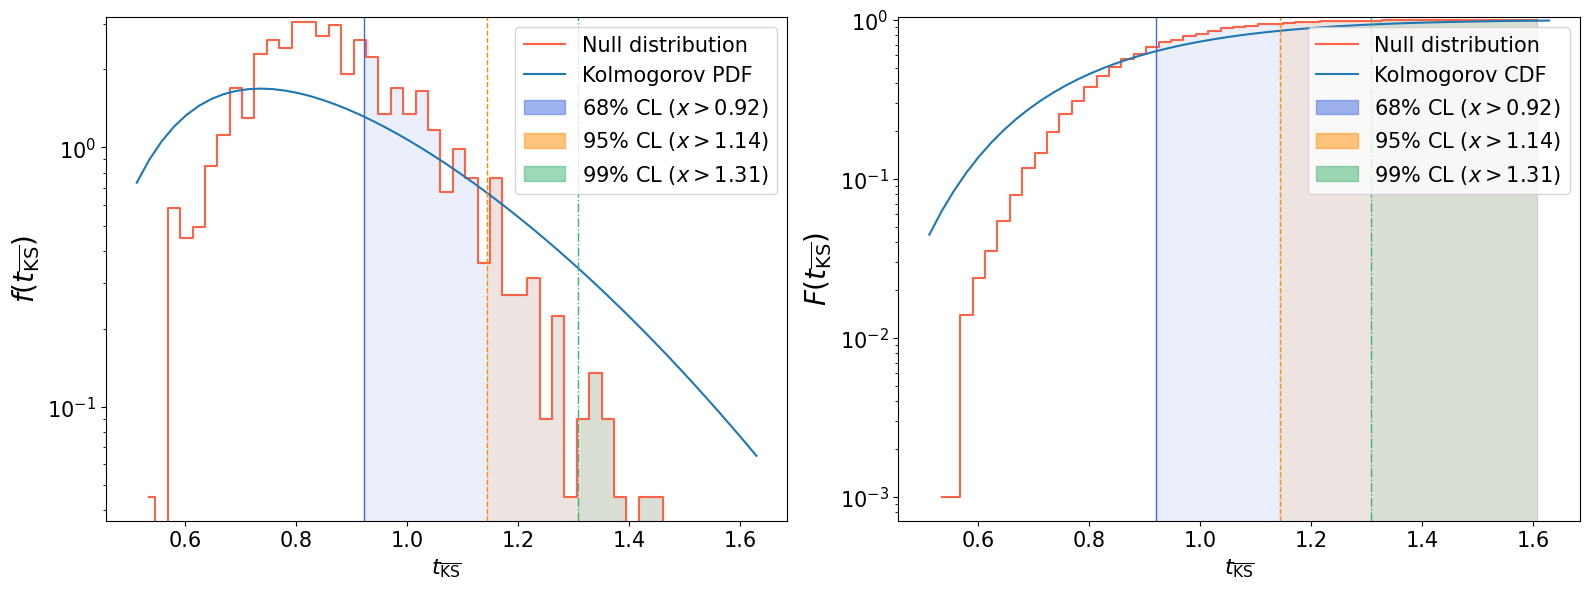

Time elapsed: 1.0275760381482542 seconds.
mu = 0.8653041373938322 +/- 0.000497552767209311
sigma = 0.12543524227668085 +/- 0.0031411294928029537
68%CL = 0.9036000818014145, 95%CL = 1.1010502465069294, 99%CL = 1.2196001596748829
mu = 0.8653041373938322 +/- 0.000497552767209311
sigma = 0.12543524227668085 +/- 0.0031411294928029537


/tmp/ipykernel_1646232/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1646232/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1646232/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1646232/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


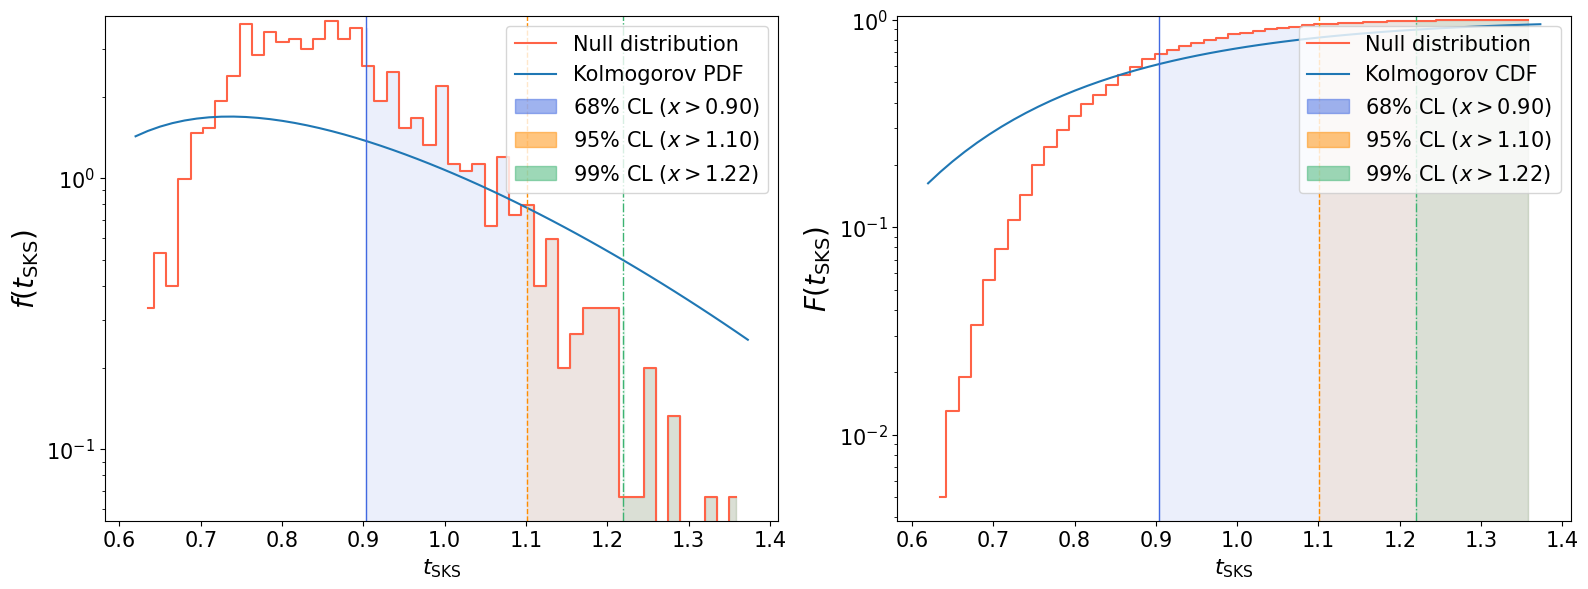

Time elapsed: 1.01547110080719 seconds.
mu = 0.6554196336679255 +/- 0.0005367993109416422
sigma = 0.13028846721734563 +/- 0.0042083037188895825
68%CL = 0.6911942036384819, 95%CL = 0.9041296771995025, 99%CL = 1.0470402613112961
mu = 0.6554196336679255 +/- 0.0005367993109416422
sigma = 0.13028846721734563 +/- 0.0042083037188895825


/tmp/ipykernel_1646232/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1646232/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1646232/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1646232/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


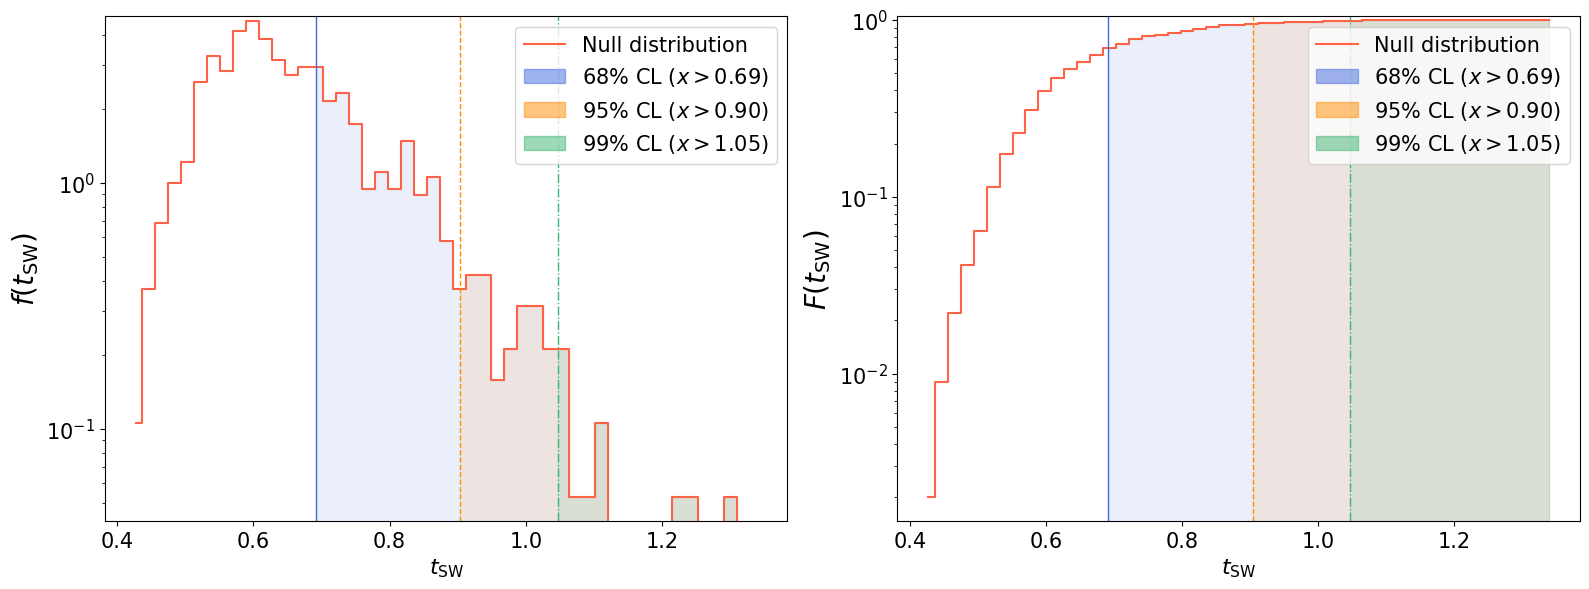

Time elapsed: 0.6515656360425055 seconds.
mu = 186.67251799700153 +/- 22.285288552077926
sigma = 26.546613746133826 +/- 0.6433929266123567
68%CL = 197.09771227853645, 95%CL = 232.3387695358682, 99%CL = 260.10909652558274
mu = 186.67251799700153 +/- 22.285288552077926
sigma = 26.546613746133826 +/- 0.6433929266123567


/tmp/ipykernel_1646232/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1646232/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1646232/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1646232/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


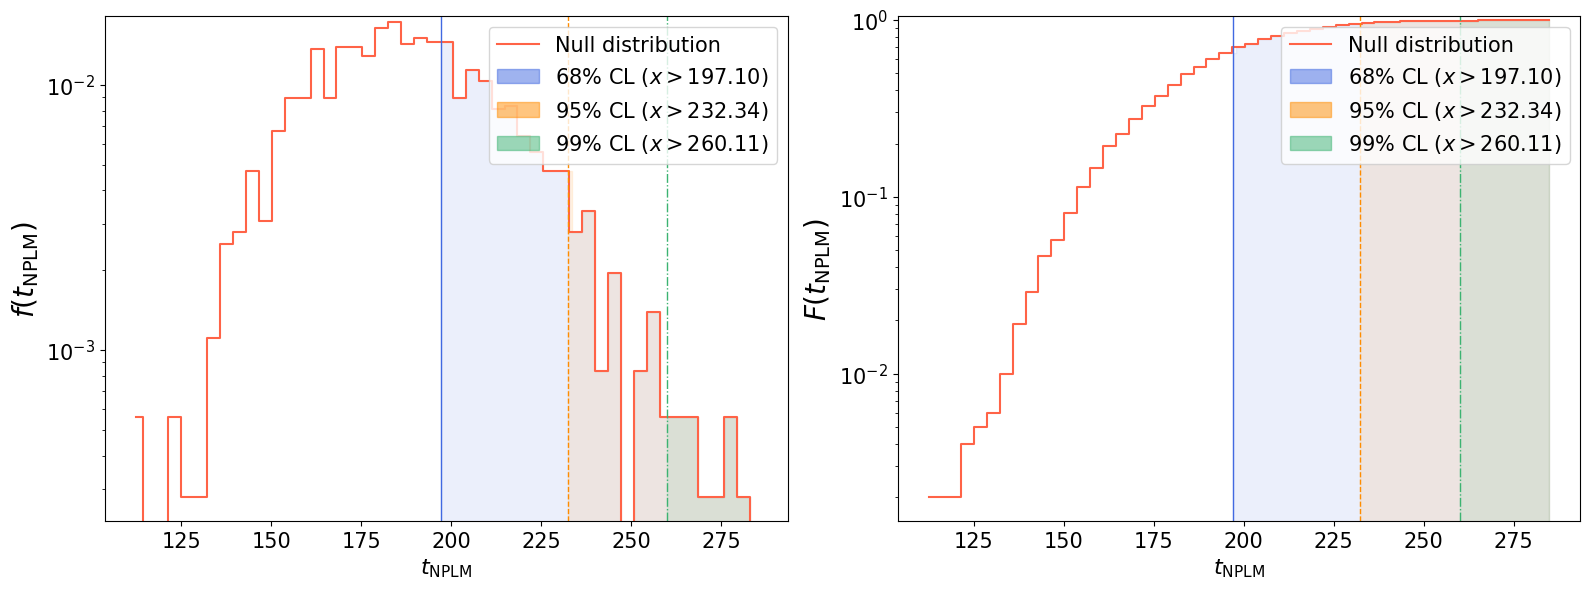

Time elapsed: 0.6954361409880221 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fgd,FGDMetricNull,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7fc652300540>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",3200,t_{\mathrm{FGD}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.000137663716558022], [0....",results/jet_features/tests/20K_preprocessed/nu...
1,mmd,MMDMetricNull,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7fc652300400>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",8,t_{\mathrm{MMD}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.0024406494027040537], [0...",results/jet_features/tests/20K_preprocessed/nu...
2,ks,KSTestNull,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7fc6523002c0>,"lambda ns, _: np.sqrt(ns)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",3200,t_{\overline{\mathrm{KS}}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.9212497621774673], [0.95...",results/jet_features/tests/20K_preprocessed/nu...
3,sks,SKSTestNull,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7fc652300220>,"lambda ns, _: np.sqrt(ns)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",100,t_{\mathrm{SKS}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.9036000818014145], [0.95...",results/jet_features/tests/20K_preprocessed/nu...
4,swd,SWDMetricNull,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7fc652300680>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 4, 'batch_size_test': 20000, 'batch_...",100,t_{\mathrm{SW}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 0.6911942036384819], [0.95...",results/jet_features/tests/20K_preprocessed/nu...
5,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 7000, 'lam': 1e-08, 'iter_list': 1000000...",metric_list,<function <lambda> at 0x7fc652300720>,"lambda ns, ndims: 1","{'niter': 4, 'batch_size_test': 20000, 'batch_...",1000,t_{\mathrm{NPLM}},results/jet_features/tests/20K_preprocessed/nu...,"[[0.68, [680, 319], 197.09771227853645], [0.95...",results/jet_features/tests/20K_preprocessed/nu...


In [36]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"$%s$" % latex, fontsize=16)
    ax[0].set_ylabel(r"$f(%s)$" % latex, fontsize=20)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"$%s$"%latex, fontsize=16)
    ax[1].set_ylabel(r"$F(%s)$" % latex, fontsize=20)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypothesis

### Scan and exclusion limits (bisection method)

In [19]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100, # this will be adapted to the boostrap size
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [20]:
# file_path = os.path.join(model_dir, "exclusion_limits.json")
# if os.path.exists(file_path):
#     try:
#         with open(file_path, "r") as file:
#             existing_data = json.load(file)
#     except json.JSONDecodeError:
#         existing_data = {}
# else:
#     existing_data = {}
    
# # Sort the dictionary by keys
# existing_data = dict(sorted(existing_data.items()))

# # Save the sorted dictionary back to a JSON file
# with open(file_path, 'w') as f:
#     json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

file_path = os.path.join(model_dir, f"exclusion_limits_M_{m_value}_lam_{lam_value}.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [21]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for deformation in deformations:
    eps_max = 1  # Default starting value
    for bound in bounds:
        try:
            # Filter results for the current deformation and bound
            result = {
                k: v for k, v in existing_data.items()
                if v["null_config"]["name"] == nplm_config["name"]
                and v["deformation"] == deformation
                and v["bound"] == bound
            }
        except Exception:
            result = {}

        if result:
            print(f"{bound.capitalize()} bounds for {nplm_config['name']} with {deformation} deformation already loaded.")
            # Update eps_max to the last computed epsilon in the exclusion list
            last_result = list(result.values())[0]
            if last_result["exclusion_list"]:
                eps_max = last_result["exclusion_list"][-1][3]  # Last epsilon value
        else:
            print(f"Computing {bound} bounds for {nplm_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection_dataset_np(
                dataset = dataset,
                metric_config=nplm_config,
                test_kwargs=test_kwargs,
                model_dir=model_dir,
                deformation=deformation,
                seed_dist=0,
                x_tol=0.01,
                fn_tol=0.05,
                bound=bound,
                eps_min=0.0,
                eps_max=eps_max,
                smear = 0.,
                max_iterations=50,
                save=True,
                filename=f"exclusion_limits_M_{m_value}_lam_{lam_value}.json",
                verbose=True
            )
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]  # Update eps_max
        global_results.update(result)

print(global_results.keys())

Upper bounds for nplm with mean deformation already loaded.
Central bounds for nplm with mean deformation already loaded.
Lower bounds for nplm with mean deformation already loaded.
Upper bounds for nplm with cov_diag deformation already loaded.
Central bounds for nplm with cov_diag deformation already loaded.
Lower bounds for nplm with cov_diag deformation already loaded.
Upper bounds for nplm with cov_off_diag deformation already loaded.
Central bounds for nplm with cov_off_diag deformation already loaded.
Lower bounds for nplm with cov_off_diag deformation already loaded.
Upper bounds for nplm with power_abs_up deformation already loaded.
Central bounds for nplm with power_abs_up deformation already loaded.
Lower bounds for nplm with power_abs_up deformation already loaded.
Upper bounds for nplm with power_abs_down deformation already loaded.
Central bounds for nplm with power_abs_down deformation already loaded.
Lower bounds for nplm with power_abs_down deformation already loaded.


## Show and save results

In [22]:
import notebooks.shared as shared

In [23]:
results_df, times_df = shared.generate_result_dataframe_nplm(global_results, null_times)

Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm


In [24]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
2,NaN,$5e-05_{-2e-05}^{+1e-05}$,$6e-05_{-1e-05}^{+1e-05}$,$34148$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
0,NaN,$0.00029_{-0.00011}^{+8e-05}$,$0.00036_{-7e-05}^{+7e-05}$,$32391$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
1,NaN,$0.00159_{-0.00089}^{+0.001}$,$0.00239_{-0.00092}^{+0.00081}$,$37314$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
4,NaN,$0.00257_{-0.00095}^{+0.00089}$,$0.00329_{-0.00069}^{+0.00074}$,$35528$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
3,NaN,$0.00276_{-0.0011}^{+0.00083}$,$0.00344_{-0.00072}^{+0.00071}$,$28707$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
5,NaN,$0.01222_{-0.0051}^{+0.0024}$,$0.01421_{-0.0018}^{+0.0021}$,$26004$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
6,NaN,$0.02112_{-0.0086}^{+0.0039}$,$0.02524_{-0.0037}^{+0.003}$,$24756$


### Latex

In [25]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex_nplm(results_df, times_df, title = "{\\bf Scaled Jet features with $\\mathbf{n=m=2\cdot 10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Scaled Jet features with $\mathbf{n=m=2\cdot 10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $5e-05_{-2e-05}^{+1e-05}$ & $6e-05_{-1e-05}^{+1e-05}$ & $34148$ & $0.00029_{-0.00011}^{+8e-05}$ & $0.00036_{-7e-05}^{+7e-05}$ & $32391$ \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation} & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.00159_{-0.00089}^{+0.001}$ & $0.00239_{-0.00092}^{+0.00081}$ & $37314$ & $0.00257_{-0.00095}^{+

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics/notebooks/shared.py:554: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return df.replace(column_replacements)


In [26]:
shared.save_latex_nplm(tex_string, model_dir, f"results_table_M_{m_value}_lam_{lam_value}.tex")

LaTeX table code has been written to results/jet_features/tests/20K_preprocessed/results_table_M_7000_lam_1e-08.tex


In [27]:
import re

# Path to the old metrics results table
file_path_nplm_jetnet_old = "/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics/results/jet_features/tests/20K_preprocessed/results_table_updated.tex"
with open(file_path_nplm_jetnet_old, 'r') as file:
    table_nplm_jetnet_old = file.read()


# Extract rows containing "$t_{\mathrm{NPLM}}$" and add coloring
nplm_rows = []
lines_nplm = tex_string.splitlines()
for line in lines_nplm:
    if "$t_{\mathrm{NPLM}}$" in line:
        nplm_rows.append("\\rowcolor{blue!35}" + line)

# Extract rows containing "$t_{\mathrm{NPLM}}$" with red coloring from the old table
nplm_old_rows = []
lines_nplm_old = table_nplm_jetnet_old.splitlines()
for line in lines_nplm_old:
    if "\\rowcolor{red!35}	$t_{\mathrm{NPLM}}$" in line:
        nplm_old_rows.append(line)

# Extract rows for SW, KS, SKS, FGD, MMD, and LLR metrics
sw_rows = []
lines_sw = table_nplm_jetnet_old.splitlines()
for line in lines_sw:
    if "$t_{\mathrm{SW}}$" in line:
        sw_rows.append(line)

ks_rows = []
lines_ks = table_nplm_jetnet_old.splitlines()
for line in lines_ks:
    if "$t_{\overline{\mathrm{KS}}}$" in line:
        ks_rows.append(line)

sks_rows = []
lines_sks = table_nplm_jetnet_old.splitlines()
for line in lines_sks:
    if "$t_{\mathrm{SKS}}$" in line:
        sks_rows.append(line)

fgd_rows = []
lines_fgd = table_nplm_jetnet_old.splitlines()
for line in lines_fgd:
    if "$t_{\mathrm{FGD}}$" in line:
        fgd_rows.append(line)

mmd_rows = []
lines_mmd = table_nplm_jetnet_old.splitlines()
for line in lines_mmd:
    if "$t_{\mathrm{MMD}}$" in line:
        mmd_rows.append(line)

# Process old lines and construct the updated table
lines_old = table_nplm_jetnet_old.splitlines()
new_lines = []
i = 0  # Index to track row additions

for line in lines_old:
    # Include lines unrelated to metrics
    if (
        "$t_{\\mathrm{SW}}$" not in line
        and "$t_{\\overline{\\mathrm{KS}}}$" not in line
        and "$t_{\\mathrm{SKS}}$" not in line
        and "$t_{\\mathrm{FGD}}$" not in line
        and "$t_{\\mathrm{MMD}}$" not in line
        and "$t_{\\mathrm{LLR}}$" not in line
        and "\\rowcolor{red!35}	$t_{\mathrm{NPLM}}$" not in line
    ):
        new_lines.append(line)
    elif "$t_{\\mathrm{SW}}$" in line:
        # Add SW line and append corresponding rows from other metrics
        new_lines.append(line)
        new_lines.append(ks_rows[i])
        new_lines.append(sks_rows[i])
        new_lines.append(fgd_rows[i])
        new_lines.append(mmd_rows[i])
        new_lines.append(nplm_old_rows[i])
        new_lines.append(nplm_rows[i])
        i = (i + 1) % len(nplm_rows)  # Ensure index doesn't exceed `nplm_rows` length
    else:
        pass

# Combine lines into the updated table
updated_table = "\n".join(new_lines)

# Print the updated table
print(updated_table)


\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Scaled Jet features with $\mathbf{n=m=2\cdot 10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm    {CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.02498_{-0.0089}^{+0.0068}$ & $0.0347_{-0.007}^{+0.0078}$ & ${\mathbf{1856}}$ & $0.03464_{-0.014}^{+0.011}$ & $0.0454_{-0.012}^{+0.011}$ & ${\mathbf{1983}}$ \\
	$t_{\overline{\mathrm{KS}}}$ & $0.02347_{-0.0084}^{+0.0081}$ & $0.0326_{-0.0065}^{+0.0073}$ & $2379$ & $0.03199_{-0.013}^{+0.012}$ & $0.04302_{-0.012}^{+0.012}$ & $3749$ \\
	$t_{\mathrm{SKS}}$ & ${\mathbf{0.01854_{-0.0078}^{+0.0052}}}$ & ${\mathbf{0.02407_{-0.0075}^{+0.0044}}}$ & $5681$ & $0.03791_{-0.016}^{+0.012}$ & $0.04866_{-0.014}^{+0.012}$ & $6885$ \\
	$t_{\mathrm{FGD}}$ & $0.0322_{-0.013}^{

In [28]:
shared.save_latex_nplm(updated_table, model_dir, f"results_table_hyper_par.tex")

LaTeX table code has been written to results/jet_features/tests/20K_preprocessed/results_table_hyper_par.tex


## Compare p-values for different epsilon values

In [26]:
import json

# Path to the other metrics results file
path_other_metrics_results = "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/JetNetMetrics/results/jet_features/tests/20K_preprocessed/exclusion_limits.json"

# Dictionary to store the smallest epsilon for each deformation
smallest_epsilons = {}

with open(path_other_metrics_results, 'r') as file:
    other_metrics_results = json.load(file)

# Iterate over the metrics and find the smallest epsilon for 0.99 confidence level in 'central' bound
for key, value in other_metrics_results.items():
    deformation = value.get("deformation", "unknown")
    bound = value.get("bound", "unknown")
    exclusion_list = value.get("exclusion_list", [])
    metric_name = value.get("name") 

    # Only consider the 'central' bound
    if bound == "central" and metric_name != "lr":
        for entry in exclusion_list:
            if isinstance(entry, list) and entry[0] == 0.99:
                epsilon_value = entry[3]  # Epsilon value is at index 3
                if deformation not in smallest_epsilons:
                    smallest_epsilons[deformation] = epsilon_value
                else:
                    # Update if a smaller epsilon is found
                    smallest_epsilons[deformation] = min(smallest_epsilons[deformation], epsilon_value)

print("Smallest epsilon values for each deformation in the 'central' bound (0.99 confidence level):")
for deformation, epsilon in smallest_epsilons.items():
    print(f"  {deformation}: {epsilon}")

# Order the results as in tables: mean, cov_diag, cov_off_diag, pow_abs_up, pow_abs_down, random_normal, random_uniform    
lowest_mean_eps = smallest_epsilons.get("mean")
lowest_cov_diag_eps = smallest_epsilons.get("cov_diag")
lowest_cov_off_diag_eps = smallest_epsilons.get("cov_off_diag")
lowest_power_abs_up_eps = smallest_epsilons.get("power_abs_up")
lowest_power_abs_down_eps = smallest_epsilons.get("power_abs_down")
lowest_random_normal_eps = smallest_epsilons.get("random_normal")
lowest_random_uniform_eps = smallest_epsilons.get("random_uniform")

input_values = [lowest_mean_eps, lowest_cov_diag_eps, lowest_cov_off_diag_eps, lowest_power_abs_up_eps, lowest_power_abs_down_eps, lowest_random_normal_eps, lowest_random_uniform_eps]

print(input_values)

Smallest epsilon values for each deformation in the 'central' bound (0.99 confidence level):
  cov_diag: 0.04039237426440856
  cov_off_diag: 0.01232863010615981
  mean: 0.024072359484303973
  power_abs_down: 0.043687632126605536
  power_abs_up: 0.04130130465853199
  random_normal: 0.11199432037574297
  random_uniform: 0.19235148167081206
[0.024072359484303973, 0.04039237426440856, 0.01232863010615981, 0.04130130465853199, 0.043687632126605536, 0.11199432037574297, 0.19235148167081206]


In [27]:
# Input from previous panel: best results from other metrics 
print(input_values)

# Corresponding deformations for each input value
deformations_to_check = [
    "mean", "cov_diag", "cov_off_diag", 
    "power_abs_up", "power_abs_down", 
    "random_normal", "random_uniform"
]

# Group results by deformation
grouped_by_deformation = {}

for key, value in global_results.items():
    deformation = value.get('deformation', 'unknown')
    bound = value.get('bound', 'unknown')
    eps_list = value.get('eps_list', [])
    metrics_mean_list = value.get('metrics_mean_list', [])  # Assume metrics_means exists in global_results

    if deformation not in grouped_by_deformation:
        grouped_by_deformation[deformation] = {}
    grouped_by_deformation[deformation][bound] = {
        "eps_list": eps_list,
        "metrics_mean_list": metrics_mean_list,
    }

dist_null = np.sort(dist_null)

p_values = []

# Check proximity for each input value and its corresponding deformation
for input_value, deformation in zip(input_values, deformations_to_check):
    print(f"\nChecking deformation {deformation} for input value: {input_value}")

    bounds = grouped_by_deformation.get(deformation, {})
    found_near = False
    tolerance_multiplier = 0.01  

    while tolerance_multiplier <= 10:  
        tolerance = tolerance_multiplier * input_value  
        closest_epsilon = None
        closest_distance = float('inf')

        for bound, data in bounds.items():
            eps_list = data["eps_list"]
            metrics_mean_list = data["metrics_mean_list"]

            for idx, eps in enumerate(eps_list):
                distance = abs(eps - input_value)
                if distance <= tolerance and distance < closest_distance:
                    closest_epsilon = (bound, eps, idx)  
                    closest_distance = distance

        if closest_epsilon:
            bound, eps, position = closest_epsilon
            metrics_mean_list_value = bounds[bound]["metrics_mean_list"][position]
            print(
                f"  The closest epsilon to the input as been found:\n"
                f"  Bound: {bound}, Epsilon value: {eps} (within {tolerance_multiplier*100:.0f}% tolerance)"
            )
            print(f"  Position: {position + 1}, Corresponding NPLM metric value: {metrics_mean_list_value}")
            
            count_greater = np.sum(dist_null > metrics_mean_list_value)
            p_value = count_greater / len(dist_null)
            
            print(f"  The corresponding p-value is: {100*p_value} %")
            found_near = True
            break  

        tolerance_multiplier += 0.01 

    if not found_near:
        print("  No epsilon values found within a tolerance of 10 times the input value.")

[0.024072359484303973, 0.04039237426440856, 0.01232863010615981, 0.04130130465853199, 0.043687632126605536, 0.11199432037574297, 0.19235148167081206]

Checking deformation mean for input value: 0.024072359484303973
  The closest epsilon to the input as been found:
  Bound: upper, Epsilon value: 0.03125 (within 30% tolerance)
  Position: 5, Corresponding NPLM metric value: 75836.29203332035
  The corresponding p-value is: 0.0 %

Checking deformation cov_diag for input value: 0.04039237426440856
  The closest epsilon to the input as been found:
  Bound: upper, Epsilon value: 0.0338442325592041 (within 17% tolerance)
  Position: 22, Corresponding NPLM metric value: 7063.971186535517
  The corresponding p-value is: 0.0 %

Checking deformation cov_off_diag for input value: 0.01232863010615981
  The closest epsilon to the input as been found:
  Bound: upper, Epsilon value: 0.013368725776672363 (within 9% tolerance)
  Position: 23, Corresponding NPLM metric value: 416.4345546598656
  The corr

## Pairwise distance tests

 The 90th percentile is: 4.2
 The number of points in the plot is: 49995000


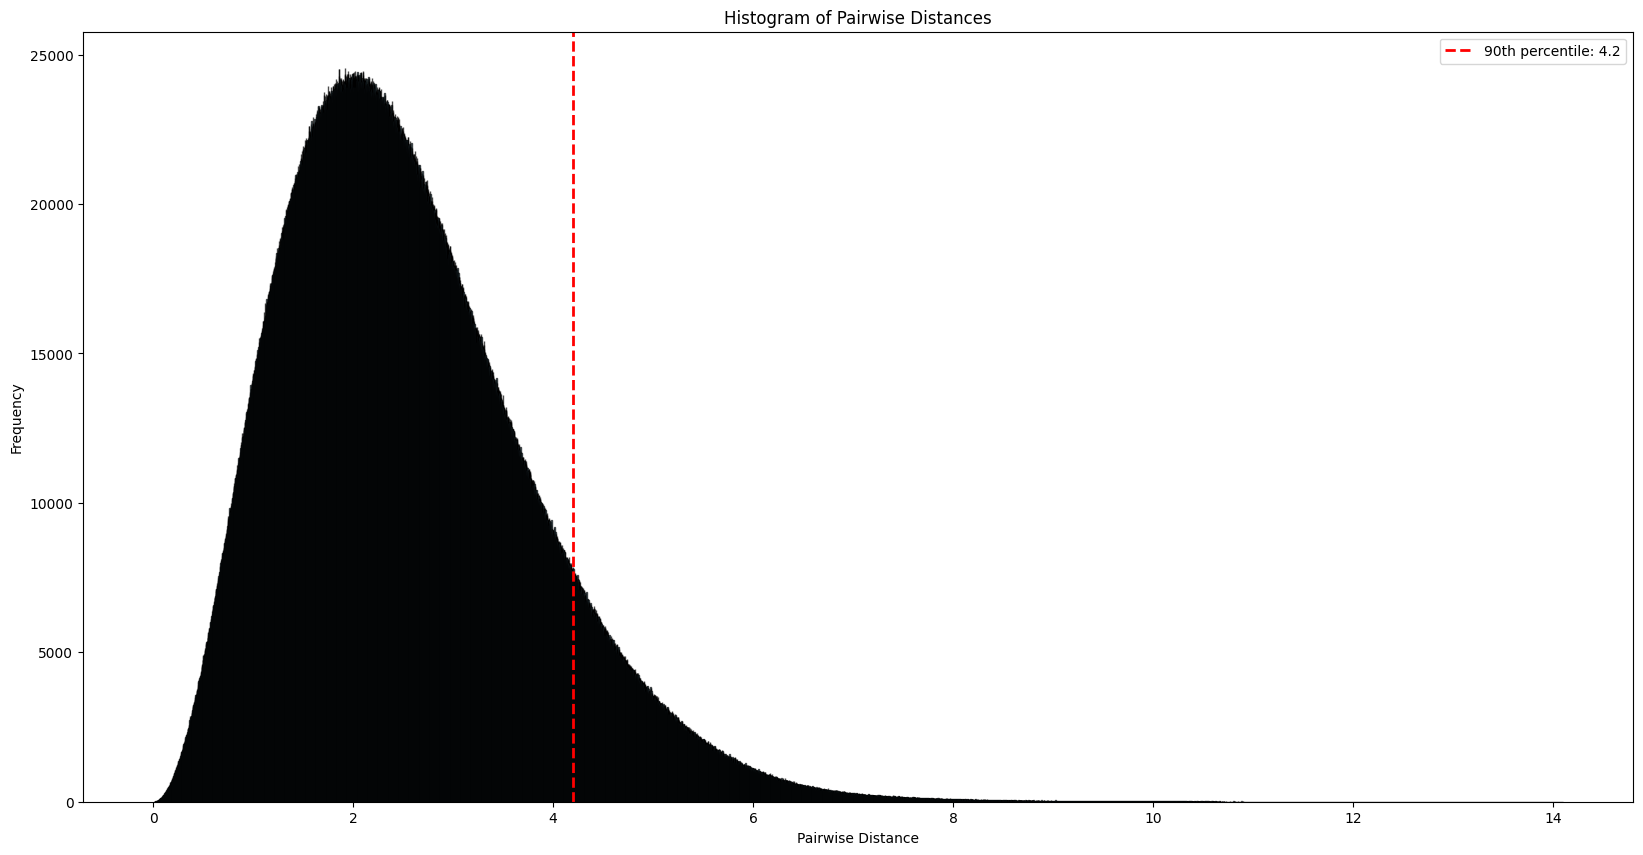

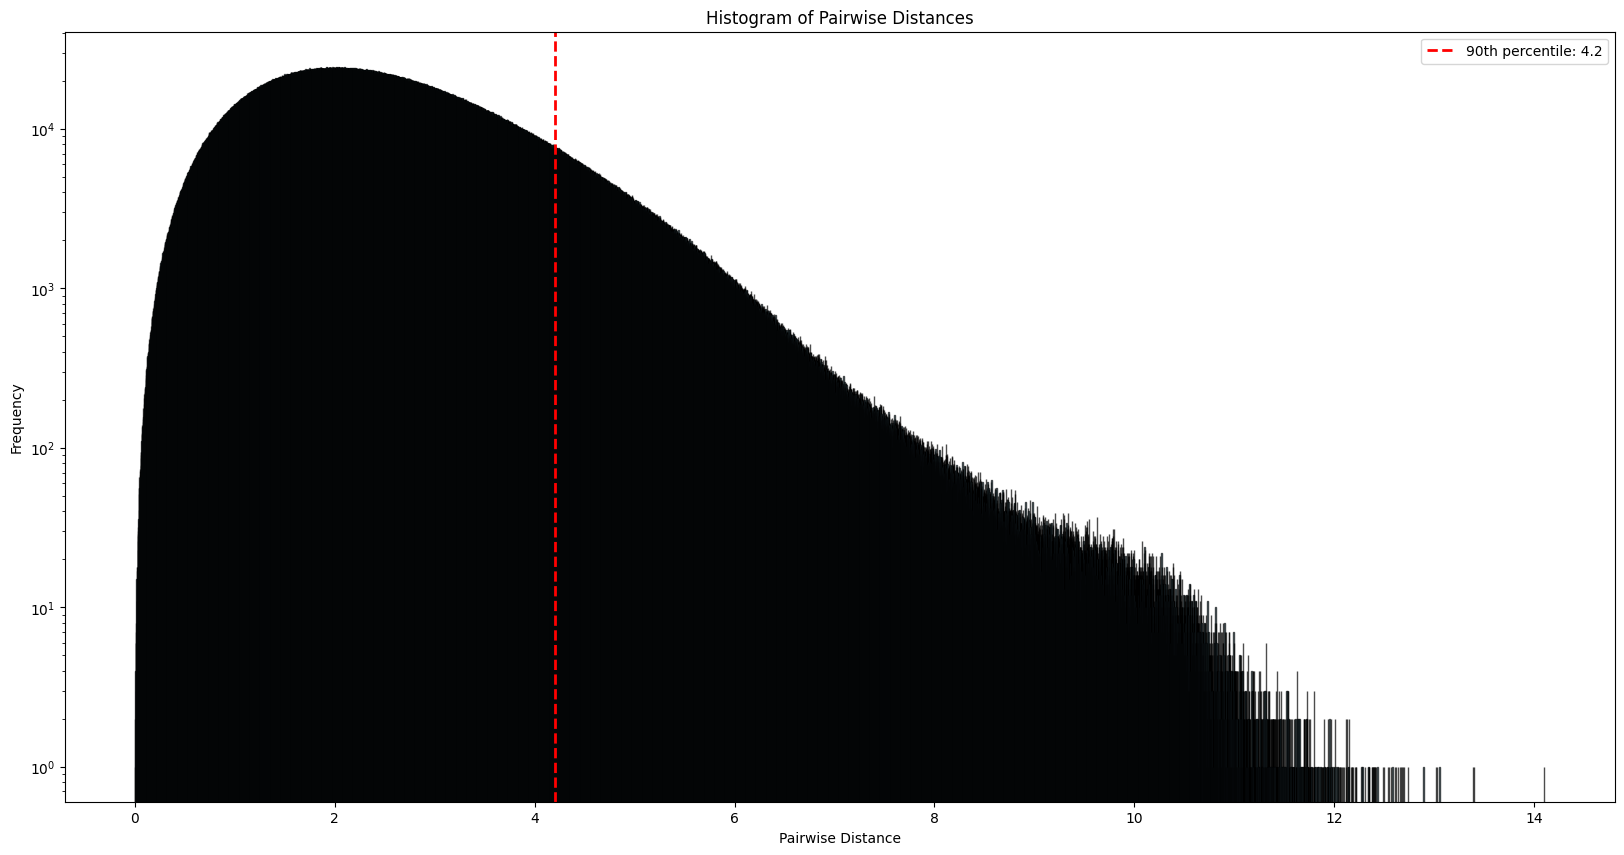

In [44]:
from scipy.spatial.distance import pdist
import math

random_dist = tf.random.shuffle(dataset)

ref_sample_for_sigma = random_dist[:10000] 
pairwise_distance = pdist(ref_sample_for_sigma)
perc = 90
percentile_90 = round(np.percentile(pairwise_distance,perc),1)

print(f" The 90th percentile is: {percentile_90}")
print(f" The number of points in the plot is: {math.comb(10000,2)}")

plt.figure(figsize=(20, 10))
plt.hist(pairwise_distance, bins=10000, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(percentile_90, color='red', linestyle='dashed', linewidth=2, label=f'90th percentile: {percentile_90}')
plt.title('Histogram of Pairwise Distances')
plt.xlabel('Pairwise Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
plt.hist(pairwise_distance, bins=10000, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(percentile_90, color='red', linestyle='dashed', linewidth=2, label=f'90th percentile: {percentile_90}')
plt.title('Histogram of Pairwise Distances')
plt.yscale('log')
plt.xlabel('Pairwise Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [17]:
from scipy.spatial.distance import pdist

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)

# dstmp = shuffle_dataset(seed = 1000)
# dist_1_null = tf.cast(dstmp[:l], tf.float64)

ref_sample_for_sigma = dist_1_null[:10000] 
pairwise_distance = pdist(ref_sample_for_sigma)
perc = 90
percentile_90 = round(np.percentile(pairwise_distance,perc),1)

print(f" The 90th percentile is: {percentile_90}")
    

 The 90th percentile is: 4.3


In [20]:
mean_4d = tf.zeros(4)  
stddev_4d = tf.ones(4)  
gaussian_4d = tfp.distributions.Normal(loc=mean_4d, scale=stddev_4d)

ref_sample_for_sigma = gaussian_4d.sample(10000)
pairwise_distance = pdist(ref_sample_for_sigma)
perc = 90
percentile_90 = round(np.percentile(pairwise_distance,perc),1)

print(f" The 90th percentile is: {percentile_90}")

 The 90th percentile is: 3.9
